In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules

#if IN_COLAB:
    # Install NNSOM
!pip install --upgrade NNSOM

In [ ]:
from NNSOM.plots import SOMPlots
from NNSOM.utils import *
import matplotlib.pyplot as plt


In [ ]:
# SOM Parameters
SOM_Row_Num = 4  # The number of row used for the SOM grid.
Dimensions = (SOM_Row_Num, SOM_Row_Num) # The dimensions of the SOM grid.

# Random State
from numpy.random import default_rng
SEED = 1234567
rng = default_rng(SEED)

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
X = iris.data
y = iris.target

# Preprocessing data
X = X[rng.permutation(len(X))]
y = y[rng.permutation(len(X))]

scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
X = np.transpose(X)

Loading Pre-trained SOM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

model_path = "/Users/sravya/Desktop/Capstone/SOM/examples/Tabular/Iris/"
trianed_file_name = "SOM_Model_iris_Epoch_500_Seed_1234567_Size_4.pkl"

# SOM Parameters
SOM_Row_Num = 4  # The number of row used for the SOM grid.
Dimensions = (SOM_Row_Num, SOM_Row_Num) # The dimensions of the SOM grid.

som = SOMPlots(Dimensions)
som = som.load_pickle(trianed_file_name, model_path)

In [ ]:
# Find quantization error
quant_err = som.quantization_error()
print('Quantization error: ' + str(quant_err))

Quantization error: 0.23929102681738026


In [ ]:
# Find topological error
top_error_1, top_error_1_2 =  som.topological_error(X)
print('Topological Error (1st neighbor) = ' + str(top_error_1) + '%')
print('Topological Error (1st and 2nd neighbor) = ' + str(top_error_1_2) + '%')

Topological Error (1st neighbor) = 16.666666666666668%
Topological Error (1st and 2nd neighbor) = 0.0%


In [ ]:
# Find Distortion Error
som.distortion_error(X)

Distortion (d=1) = 1.4671372440256776
Distortion (d=2) = 2.171897087155507
Distortion (d=3) = 2.031116773122416


Visualization

Data Preparation to pass additional variables

In [ ]:
# persentage of sentosa
numNeurons = som.numNeurons

perc_sentosa = []


In [47]:
proportion_sentosa = []
for i in range(som.numNeurons):  # S is the total number of neurons
    cluster_indices = som.clust[i]
    sentosa_in_cluster = 0

    # Count how many indices in this cluster are in sentosa
    for index in cluster_indices:
        if y[index] == 0:
            sentosa_in_cluster += 1

    # Calculate the proportion of sentosa in this cluster
    if len(cluster_indices) > 0:
        proportion = sentosa_in_cluster / len(cluster_indices)
    else:
        proportion = 0  # Avoid division by zero if the cluster is empty

    # Add the calculated proportion to the list
    proportion_sentosa.append(proportion)

# Get percentatges for each neuron
perc_sentosa = np.array(proportion_sentosa) * 100
perc_sentosa1 = (np.array(proportion_sentosa) * 100).astype(int)

In [127]:
som.clust[:]

[array([ 60,  36,  24,  45, 120,  51,   2]),
 array([137,  50,  83,  23,  28,  77]),
 array([], dtype=int64),
 array([ 48,  66, 149,  67,  42,  22,   6]),
 array([ 20,  33, 142, 118, 139,  72, 114]),
 array([ 61,  11,  91,   9,   4, 117,  27, 124,  41,  30,  46,  25,  90,
         98, 102, 145,  92,  19, 134,   7, 126, 112, 138,  44,  95]),
 array([ 87,  35,  81, 110,  43,  10,  64,  18, 136,  96,  14,  53, 101,
         17, 128,  65,  97]),
 array([ 68, 135, 130,   8,  15,  69,  62,  54,  73, 146]),
 array([ 88, 111, 131, 116, 148, 106,  29,  52]),
 array([105,  31,  55,  16, 123, 129, 121]),
 array([104,   5,  13,  89,  49,  74, 140, 113,   3, 133, 132,  75,  79,
         40,  32, 115,  85,  71, 103,  82, 144]),
 array([108,  78,  63, 141,  59,  80, 107, 100,  99,  84]),
 array([ 26,  70, 109,  93,  39,  34,  86,  76,  12, 125,  21, 119]),
 array([ 94,   0,  38,  56,  37,  47, 147]),
 array([1]),
 array([143, 127, 122,  58,  57])]

In [103]:
all_cluster_indices = []

for i in range(som.numNeurons):
    cluster_indices = som.clust[i]
    all_cluster_indices.append(cluster_indices)

# Now all_cluster_indices contains all cluster indices


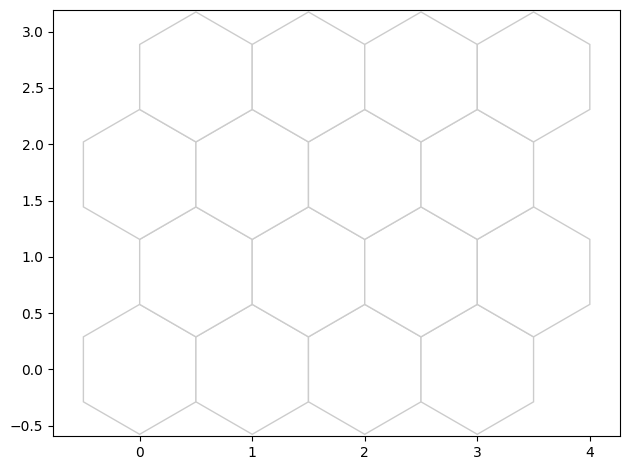

In [ ]:
# SOM Topology
fig1, ax1, patches1 = som.plt_top()
plt.show()


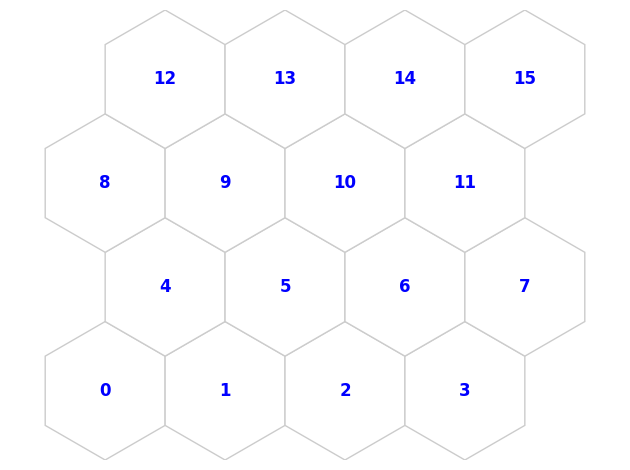

In [ ]:
# SOM Topology with neruon numbers
fig2, ax2, pathces2, text2 = som.plt_top_num()
plt.show()

Darker: Less sentosa

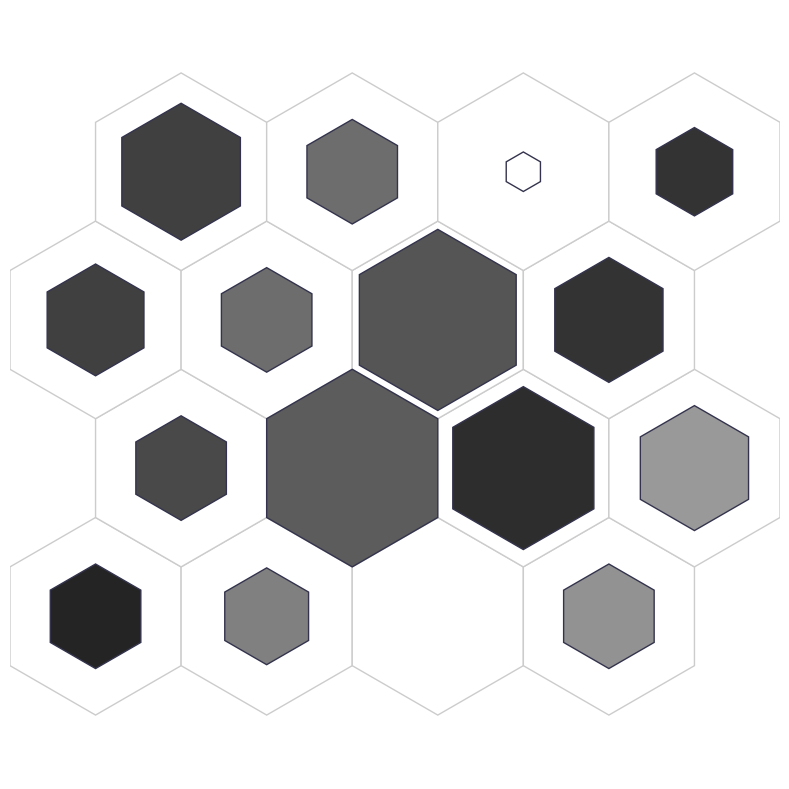

In [ ]:
# Visualization
fig, ax, pathces, text = som.gray_hist(X, perc_sentosa)
plt.show()

Color Hist

/usr/local/lib/python3.10/dist-packages/NNSOM/plots.py:268: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ticktext)


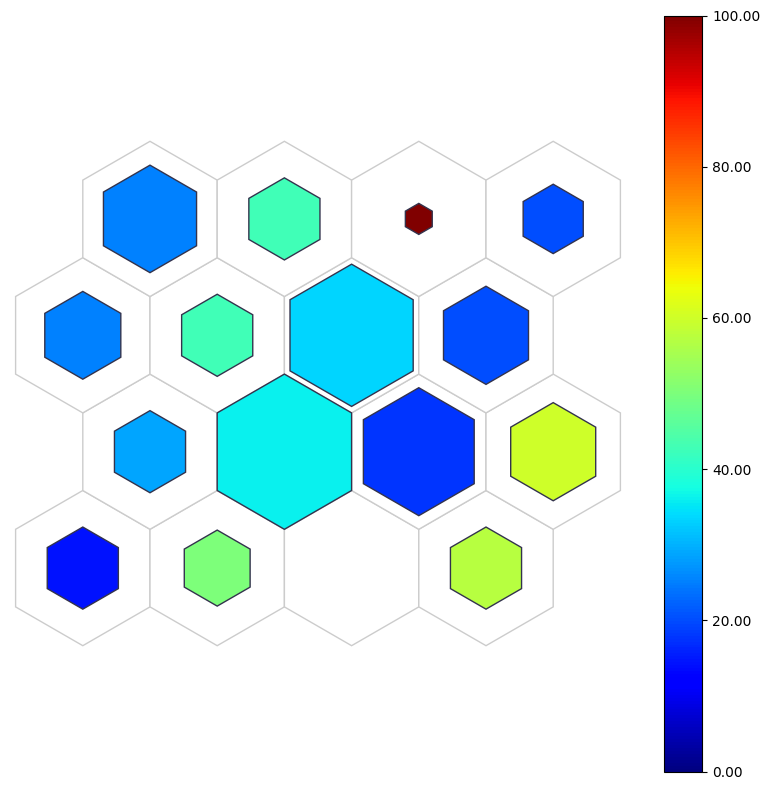

In [ ]:
fig, ax, pathces, text = som.color_hist(X, perc_sentosa)
plt.show()

Complex Hist

Simple Grid

/usr/local/lib/python3.10/dist-packages/NNSOM/plots.py:549: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ticktext)


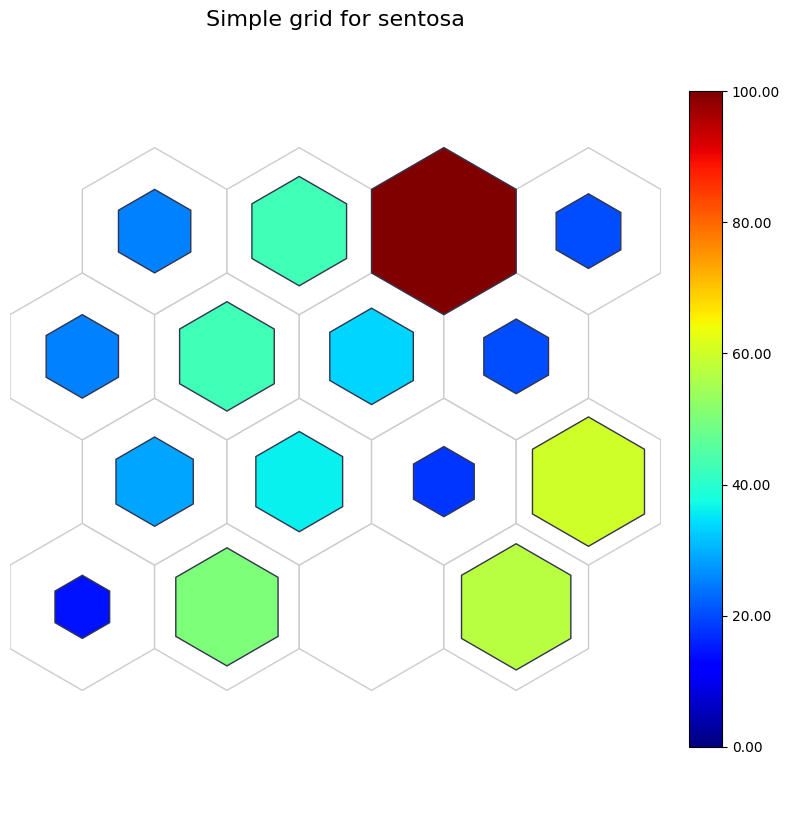

In [37]:
# Plot color code for sentosa in each cluster
fig51, ax51, patches51, cbar51 = som.simple_grid(perc_sentosa, proportion_sentosa)
plt.title('Simple grid for sentosa', fontsize=16)
plt.show()

Multiplot - pie

IndexError: list index out of range

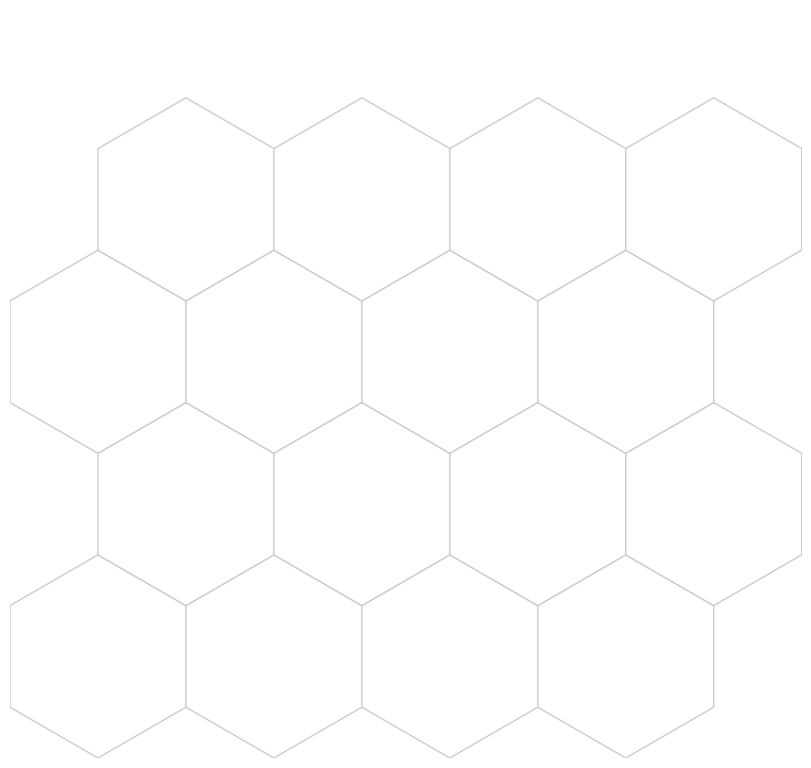

In [161]:
shapw = som.w.shape
S = shapw[0]
same_size = 100*np.ones(S)

for i in range(3):
    # Plot the pie plots showing tp, fn, tn, fp for each cluster, with same size for each hexagon
    Title  = 'pie plot for Sentosa'
    # Title = 'TP(g), FN(y), TN(b), FP(r) for '  +  Category[i]
    fig2, ax2, handles2 = som.multiplot('pie', Title, same_size)
    plt.show()

Multiplot - dist

IndexError: list index out of range

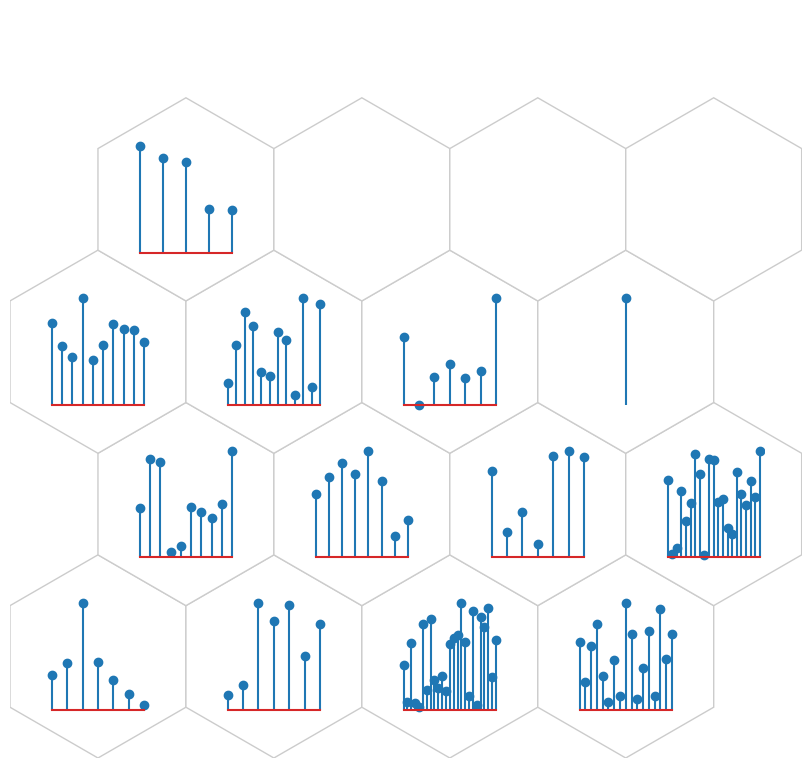

In [147]:
fig9, ax9, h_axes9 = som.multiplot('dist',som.clust[-13:])
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

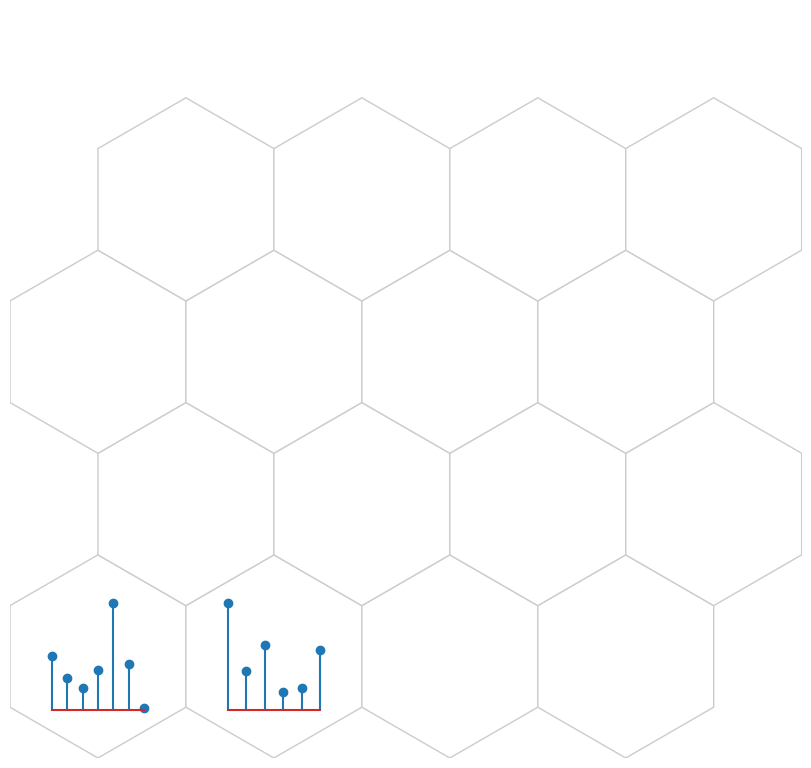

In [146]:
fig9, ax9, h_axes9 = som.multiplot('dist',som.clust[-16:])
plt.show()

Multiplot - hist

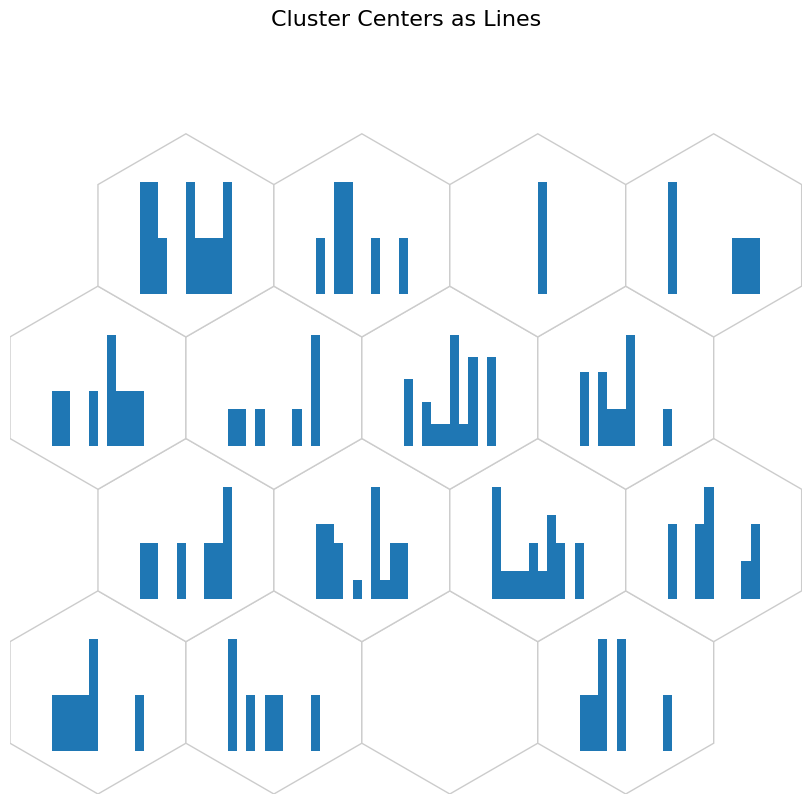

In [132]:
fig,ax,h_axes = som.multiplot('hist', som.clust[-16:])
plt.show()

Multiplot - boxplot

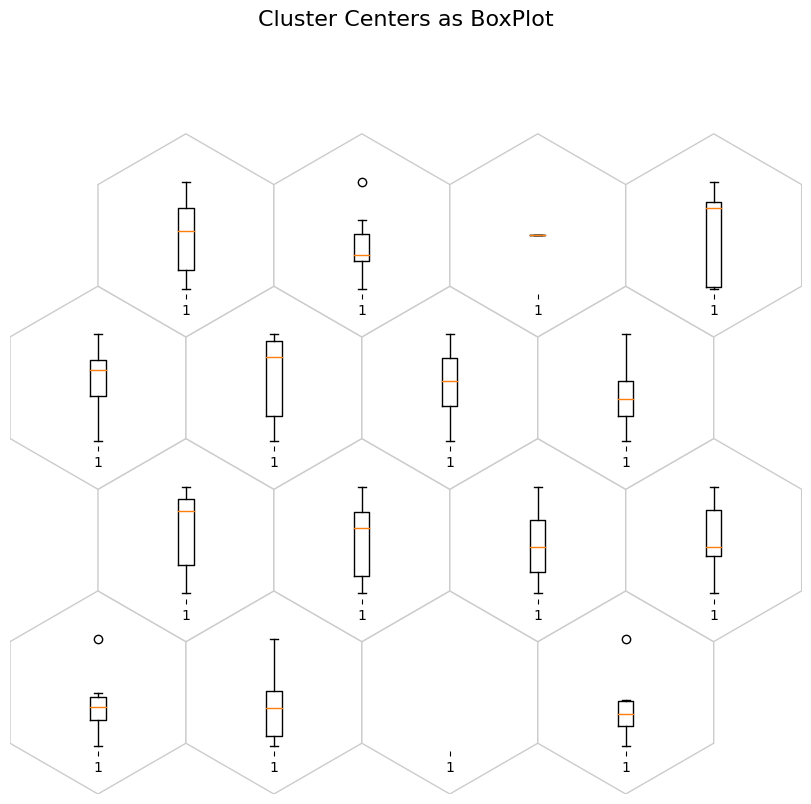

In [139]:
fig,ax,h_axes = som.multiplot('boxplot',som.clust[-16:])
plt.show()

Multiplot - fanchart

Multiplot - violin

IndexError: invalid index to scalar variable.

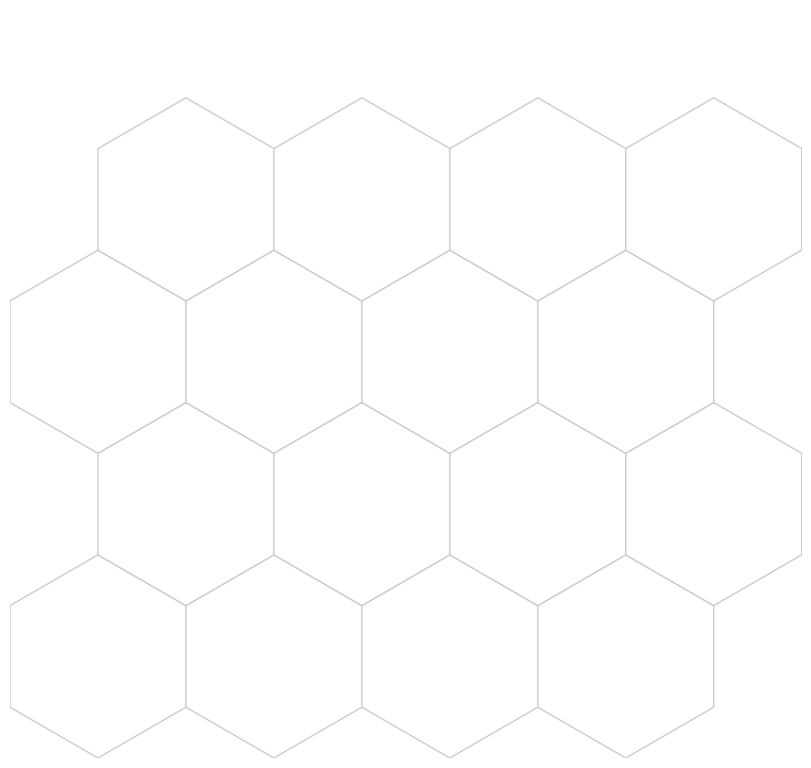

In [164]:
fig, ax, h_axes = som.multiplot('violin', som.clust[-16:])
plt.show()
